In [61]:
import pandas as pd
import pymongo
from bson.json_util import dumps
import json
import random

# Import MongoDB and AWS access paramaters
from config import user, password, key_id, secret_access_key

# Import plotting libraries
import matplotlib.pyplot as plt
import networkx as nx 
import plotly.graph_objects as go
from textwrap import wrap

# Import AWS SDK
import boto3


In [2]:
# Use a random punk_id as dummy imput for id_selection
id_selection = str(random.randrange(0,10000,1))
id_selection

'4189'

In [20]:
# construct the connection string for Atlas
CONNECTION_STRING = "mongodb+srv://"+ user + ":" + password +"@cluster0.wddnt.mongodb.net/crypto_punks_mdb?retryWrites=true&w=majority"

# Create the connection client to Atlas
client = pymongo.MongoClient(CONNECTION_STRING) 

# indicate the database to access in Atlas
db = pymongo.database.Database(client,'crypto_punks_mdb')
  
# assign the connection to the database and collection to a variable (i.e. this still is not 'reading' 
# the data from the database)
deals = pymongo.collection.Collection(db, 'txn_history_col')
punks = pymongo.collection.Collection(db, 'crypto_punks_col')
      
# search the database for the unique punk_id value provided as input to 
# the function and assign the output to a variable. The output will be an object.
deals_data = json.loads(dumps(deals.find({"punk_id":id_selection})))
punks_data = json.loads(dumps(punks.find({"punk_id":id_selection})))


In [21]:
# Inspect the attributes_data
deals_data

[{'_id': {'$oid': '61e490f73b1f7989e77e3d37'},
  'txn_index': '63847',
  'txn_type': 'Sold',
  'from': '0x8a10c6',
  'to': '0x269616',
  'date': '2021-08-28 00:00:00',
  'timestamp': '2021-08-28 00:00:00',
  'source': 'larvalabs',
  'eth': '0.0',
  'punk_id': '4189',
  'from_wallet_address': 'nan',
  'to_wallet_address': 'nan'},
 {'_id': {'$oid': '61e490f73b1f7989e77e3d38'},
  'txn_index': '63848',
  'txn_type': 'Offered',
  'from': 'nan',
  'to': '0x269616',
  'date': '2021-08-28 00:00:00',
  'timestamp': '2021-08-28 00:00:00',
  'source': 'larvalabs',
  'eth': '0.0',
  'punk_id': '4189',
  'from_wallet_address': 'nan',
  'to_wallet_address': 'nan'},
 {'_id': {'$oid': '61e490f73b1f7989e77e3d39'},
  'txn_index': '63849',
  'txn_type': 'Sold',
  'from': '0x38039d',
  'to': '0x8a10c6',
  'date': '2021-08-28 00:00:00',
  'timestamp': '2021-08-28 00:00:00',
  'source': 'larvalabs',
  'eth': '138.55',
  'punk_id': '4189',
  'from_wallet_address': 'nan',
  'to_wallet_address': 'nan'},
 {'_id

In [22]:
# Convert the json strings to dataframe
deals_df = pd.DataFrame(deals_data)
deals_df = deals_df.drop(columns=["_id"])
deals_df

,txn_index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,63847,Sold,0x8a10c6,0x269616,2021-08-28 00:00:00,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
1,63848,Offered,nan,0x269616,2021-08-28 00:00:00,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
2,63849,Sold,0x38039d,0x8a10c6,2021-08-28 00:00:00,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
3,63850,Offered,nan,nan,2021-08-28 00:00:00,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
4,63851,Transfer,0xbe39ad,0x38039d,2021-06-14 00:00:00,2021-06-14 00:00:00,larvalabs,0.0,4189,nan,nan
5,63852,Sold,astrober…,0xbe39ad,2021-06-08 00:00:00,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
6,63853,Bid Withdrawn,0x194171,nan,2021-06-08 00:00:00,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
7,63854,Offered,nan,nan,2021-06-08 00:00:00,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
8,63855,Bid,0x194171,nan,2021-06-08 00:00:00,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
9,63856,Offer Withdrawn,nan,nan,2021-06-08 00:00:00,2021-06-08 00:00:00,larvalabs,0.0,4189,nan,nan


In [23]:
# Inspect data types
deals_df.dtypes

txn_index              object
txn_type               object
from                   object
to                     object
date                   object
timestamp              object
source                 object
eth                    object
punk_id                object
from_wallet_address    object
to_wallet_address      object
dtype: object

In [24]:
# Convert date to datetime
deals_df['date'] = pd.to_datetime(deals_df['date'])
deals_df

,txn_index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,63847,Sold,0x8a10c6,0x269616,2021-08-28,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
1,63848,Offered,nan,0x269616,2021-08-28,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
2,63849,Sold,0x38039d,0x8a10c6,2021-08-28,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
3,63850,Offered,nan,nan,2021-08-28,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
4,63851,Transfer,0xbe39ad,0x38039d,2021-06-14,2021-06-14 00:00:00,larvalabs,0.0,4189,nan,nan
5,63852,Sold,astrober…,0xbe39ad,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
6,63853,Bid Withdrawn,0x194171,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
7,63854,Offered,nan,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
8,63855,Bid,0x194171,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
9,63856,Offer Withdrawn,nan,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,0.0,4189,nan,nan


In [25]:
# Inspect data types
deals_df.dtypes

txn_index                      object
txn_type                       object
from                           object
to                             object
date                   datetime64[ns]
timestamp                      object
source                         object
eth                            object
punk_id                        object
from_wallet_address            object
to_wallet_address              object
dtype: object

In [26]:
# Sort by dates
#deals_df = deals_df.sort_values(["date"], ascending=True)

# Re-index the dataframe
deals_df = deals_df.reset_index(drop=True)
deals_df

,txn_index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,63847,Sold,0x8a10c6,0x269616,2021-08-28,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
1,63848,Offered,nan,0x269616,2021-08-28,2021-08-28 00:00:00,larvalabs,0.0,4189,nan,nan
2,63849,Sold,0x38039d,0x8a10c6,2021-08-28,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
3,63850,Offered,nan,nan,2021-08-28,2021-08-28 00:00:00,larvalabs,138.55,4189,nan,nan
4,63851,Transfer,0xbe39ad,0x38039d,2021-06-14,2021-06-14 00:00:00,larvalabs,0.0,4189,nan,nan
5,63852,Sold,astrober…,0xbe39ad,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
6,63853,Bid Withdrawn,0x194171,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
7,63854,Offered,nan,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan
8,63855,Bid,0x194171,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,12.0,4189,nan,nan
9,63856,Offer Withdrawn,nan,nan,2021-06-08,2021-06-08 00:00:00,larvalabs,0.0,4189,nan,nan


## Build Price History Chart

In [27]:
# Display transaction and price history
sold = deals_df[deals_df.txn_type == 'Sold'].groupby("date").agg({"eth": ["median"]}).reset_index("date")
sold

,date,eth
,,median
0,2021-03-31,16.000
1,2021-04-08,21.000
2,2021-06-08,13.000
3,2021-08-28,69.275


In [28]:
bid = deals_df[deals_df.txn_type == 'Bid'].groupby("date").agg({"eth": ["median"]}).reset_index("date")
bid

,date,eth
,,median
0,2021-03-31,15.225
1,2021-06-04,9.100
2,2021-06-06,11.500
3,2021-06-08,12.000


In [29]:
offered = deals_df[deals_df.txn_type == 'Offered'].groupby("date").agg({"eth": ["median"]}).reset_index("date")
offered

,date,eth
,,median
0,2021-03-31,16.500
1,2021-04-06,18.000
2,2021-04-08,20.500
3,2021-04-13,42.000
4,2021-05-09,33.300
5,2021-05-13,19.300
6,2021-05-29,17.990
7,2021-06-03,15.990
8,2021-06-04,15.000


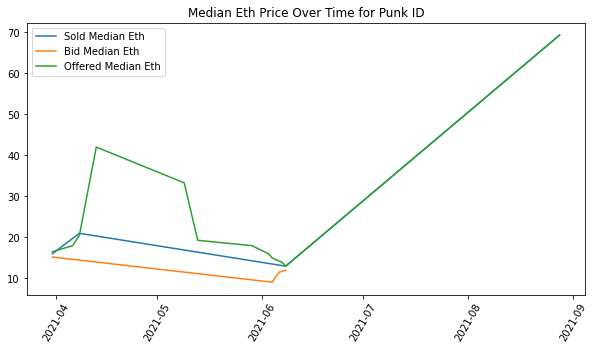

In [30]:
plt.figure(figsize=(10,5))
plt.plot(sold['date'], sold['eth']['median'], label="Sold Median Eth")
plt.plot(bid['date'], bid['eth']['median'], label="Bid Median Eth")
plt.plot(offered['date'], offered['eth']['median'], label="Offered Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price Over Time for Punk ID")

# Save the image locally
image_name = "price_graph.png"
plt.savefig("static/images/" + image_name)

In [31]:
# Export Chart

# Create AWS connection
s3 = boto3.resource('s3', aws_access_key_id=key_id, aws_secret_access_key=secret_access_key)

bucket = "cryptopunksbucket"

# upload image to aws s3
# warning, the ACL here is set to public-read
img_data = open("static/images/" + image_name, "rb")
s3.Bucket(bucket).put_object(Key=image_name, Body=img_data, ContentType="image/png", ACL="public-read")
#s3.upload_fileobj(bucket, "static/images/" + image_name)

s3.Object(bucket_name='cryptopunksbucket', key='price_graph.png')

## Build Network Chart

In [32]:
# Transaction types to filter
filter_types = ["Sold", "Bid", "Transfer", "Claimed"]

# Filter the dataframe for relevant transaction types
deals_df = deals_df.loc[deals_df["txn_type"].isin(filter_types)]

# Sort by dates
deals_df = deals_df.sort_values(["date"], ascending=True)

# Re-index the dataframe
deals_df = deals_df.reset_index(drop=True)
deals_df

,txn_index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,63887,Claimed,nan,0x6f4a2d,2017-06-23,2017-06-23 00:00:00,larvalabs,0.0,4189,nan,nan
1,63879,Sold,0x6f4a2d,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,16.0,4189,nan,nan
2,63880,Bid,0x71a31c,nan,2021-03-31,2021-03-31 00:00:00,larvalabs,15.5,4189,nan,nan
3,63881,Bid,wookie.e…,nan,2021-03-31,2021-03-31 00:00:00,larvalabs,15.25,4189,nan,nan
4,63883,Bid,wookie.e…,nan,2021-03-31,2021-03-31 00:00:00,larvalabs,15.2,4189,nan,nan
5,63885,Bid,wookie.e…,nan,2021-03-31,2021-03-31 00:00:00,larvalabs,15.0,4189,nan,nan
6,63874,Sold,0xe28855,astrober…,2021-04-08,2021-04-08 00:00:00,larvalabs,21.0,4189,nan,nan
7,63862,Bid,rockinro…,nan,2021-06-04,2021-06-04 00:00:00,larvalabs,9.1,4189,nan,nan
8,63860,Bid,0x194171,nan,2021-06-06,2021-06-06 00:00:00,larvalabs,11.5,4189,nan,nan
9,63852,Sold,astrober…,0xbe39ad,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan


In [33]:
# Correct dataframe for nan's
for row in range(len(deals_df)):
    if (deals_df.at[row,"from"] == "nan") & (deals_df.at[row,"txn_type"] == "Claimed"):
        deals_df.at[row,"from"] = "larvalabs"
    if (deals_df.at[row,"to"] == "nan") & (deals_df.at[row,"txn_type"] == "Bid"):
        deals_df.at[row,"to"] = deals_df.at[row-1,"to"]

deals_df

,txn_index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,63887,Claimed,larvalabs,0x6f4a2d,2017-06-23,2017-06-23 00:00:00,larvalabs,0.0,4189,nan,nan
1,63879,Sold,0x6f4a2d,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,16.0,4189,nan,nan
2,63880,Bid,0x71a31c,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,15.5,4189,nan,nan
3,63881,Bid,wookie.e…,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,15.25,4189,nan,nan
4,63883,Bid,wookie.e…,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,15.2,4189,nan,nan
5,63885,Bid,wookie.e…,0xe28855,2021-03-31,2021-03-31 00:00:00,larvalabs,15.0,4189,nan,nan
6,63874,Sold,0xe28855,astrober…,2021-04-08,2021-04-08 00:00:00,larvalabs,21.0,4189,nan,nan
7,63862,Bid,rockinro…,astrober…,2021-06-04,2021-06-04 00:00:00,larvalabs,9.1,4189,nan,nan
8,63860,Bid,0x194171,astrober…,2021-06-06,2021-06-06 00:00:00,larvalabs,11.5,4189,nan,nan
9,63852,Sold,astrober…,0xbe39ad,2021-06-08,2021-06-08 00:00:00,larvalabs,13.0,4189,nan,nan


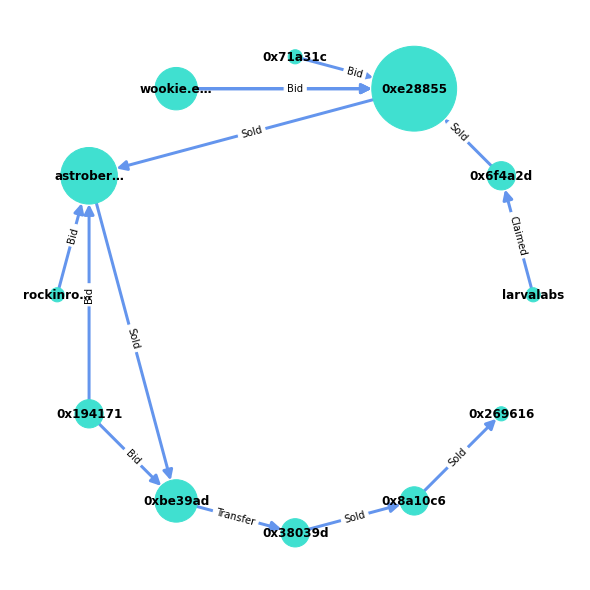

In [34]:
plt.figure(figsize=(8,8))

G = nx.MultiDiGraph()

# Create a empty dictionary for the edge labels
mylabels={}

color_dict = {"Sold": "green", "Transfer": "pink", "Bid": "orange", "Claimed": "yellow"}

for row in range(len(deals_df)):
    
    # Add to-from nodes
    G.add_node(deals_df.at[row,"from"])
    
    # Add edges to the nodes
    G.add_edge(deals_df.at[row,"from"],deals_df.at[row,"to"], color="red", weight=deals_df.at[row,"eth"], size=deals_df.at[row,"eth"])
    
    # Add the transaction type as edge label
    mylabels[deals_df.at[row,"from"],deals_df.at[row,"to"]]=deals_df.at[row,"txn_type"]


pos=nx.circular_layout(G)

d = dict(G.degree)

nx.draw(G, pos, node_size = [v**2*200 for v in d.values()], node_color='turquoise', edge_color="cornflowerblue", arrowsize=20, width=3, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, mylabels, label_pos=.5)

# Save the image locally
image_name = "network_graph.png"
plt.savefig("static/images/" + image_name)

In [35]:
# Export image to an S3 bucket

# Create AWS connection
s3 = boto3.resource('s3', aws_access_key_id=key_id, aws_secret_access_key=secret_access_key)

bucket = "cryptopunksbucket"

# upload image to aws s3
# warning, the ACL here is set to public-read
img_data = open("static/images/" + image_name, "rb")
s3.Bucket(bucket).put_object(Key=image_name, Body=img_data, ContentType="image/png", ACL="public-read")


s3.Object(bucket_name='cryptopunksbucket', key='network_graph.png')

## Build Punk Image

In [36]:
# Inspect the data
punks_data

[{'_id': {'$oid': '61e485b7c34e5e3a5c6ae80b'},
  'punk_id': '4189',
  'type': 'Male',
  'accessories': ['Horned Rim Glasses', 'Knitted Cap'],
  'type_ML': '0',
  'type_PRED': '0',
  'glasses_ML': '1',
  'glasses_PRED': '1',
  'info_URL': 'https://www.larvalabs.com/cryptopunks/details/4189',
  'image_bitmap': [[[0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]],
   [[0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0,

In [49]:
# Obtain the image bitmap
image_bitmap = punks_data[0]["image_bitmap"]
image_bitmap

[[[0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0]],
 [[0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0]],
 [[0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [0, 

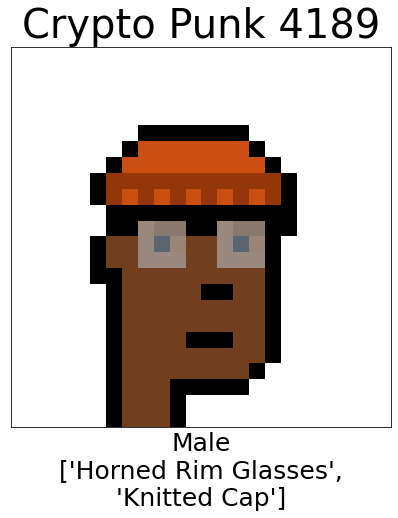

In [72]:
plt.figure(figsize=(7,7))
img = plt.imshow(image_bitmap)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.title("Crypto Punk "+str(id_selection), fontsize=40)
punk_type = punks_data[0]["type"]
punk_accessories = str(punks_data[0]["accessories"])
wrapped_label = punk_type+"\n"+("\n".join(wrap(punk_accessories,30)))
plt.xlabel(wrapped_label, fontsize=25)

# Save the image locally
image_name = "crypto_punk.png"
plt.savefig("static/images/" + image_name)

In [73]:
# Export image to an S3 bucket

# Create AWS connection
s3 = boto3.resource('s3', aws_access_key_id=key_id, aws_secret_access_key=secret_access_key)

bucket = "cryptopunksbucket"

# upload image to aws s3
# warning, the ACL here is set to public-read
img_data = open("static/images/" + image_name, "rb")
s3.Bucket(bucket).put_object(Key=image_name, Body=img_data, ContentType="image/png", ACL="public-read")


s3.Object(bucket_name='cryptopunksbucket', key='crypto_punk.png')

## END